In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)


In [2]:
df = pd.read_csv("Cardiotocographic.csv")
print('Dataset loaded. Shape:', df.shape)
df.head()


Dataset loaded. Shape: (2126, 14)


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [4]:
missing = df.isnull().sum()
if missing.sum()>0:
    display(missing[missing>0])
else:
    print('No missing values detected.')
missing


LB          21
AC          20
DS          21
DP          21
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [5]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
LB,2105.0,133.343598,11.270154,51.842487,126.000000,133.000000,140.000000,214.000000
AC,2106.0,0.003219,0.004391,-0.019284,0.000000,0.001634,0.005650,0.038567
FM,2126.0,0.009894,0.067540,-0.480634,0.000000,0.000000,0.002567,0.961268
UC,2126.0,0.004391,0.003340,-0.014925,0.001851,0.004484,0.006536,0.030002
DL,2126.0,0.001895,0.003343,-0.015393,0.000000,0.000000,0.003289,0.030769
DS,2105.0,0.000003,0.000142,-0.001353,0.000000,0.000000,0.000000,0.002706
DP,2105.0,0.000175,0.000840,-0.005348,0.000000,0.000000,0.000000,0.010695
ASTV,2126.0,46.995984,18.813973,-63.000000,32.000000,49.000000,61.000000,162.000000
MSTV,2126.0,1.364378,1.173632,-6.600000,0.700000,1.200000,1.700000,13.800000
ALTV,2126.0,10.285964,21.205041,-91.000000,0.000000,0.000000,11.000000,182.000000


In [6]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
summary = pd.DataFrame({
    'median': df.median(),
    'std': df.std(),
    'IQR': iqr
})
summary


,median,std,IQR
LB,133.000000,11.270154,14.000000
AC,0.001634,0.004391,0.005650
FM,0.000000,0.067540,0.002567
UC,0.004484,0.003340,0.004685
DL,0.000000,0.003343,0.003289
DS,0.000000,0.000142,0.000000
DP,0.000000,0.000840,0.000000
ASTV,49.000000,18.813973,29.000000
MSTV,1.200000,1.173632,1.000000
ALTV,0.000000,21.205041,11.000000


## Data types & cleaning suggestions

If any numeric columns were loaded as objects/strings, convert them using `pd.to_numeric(df['col'], errors='coerce')` and re-check missing values.

In [7]:
def flag_outliers_iqr(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return ((series < lower) | (series > upper))

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
outlier_counts = {}
for col in num_cols:
    outlier_counts[col] = int(flag_outliers_iqr(df[col]).sum())
outlier_counts = pd.Series(outlier_counts).sort_values(ascending=False)
outlier_counts[outlier_counts>0]


NSP         559
FM          347
ALTV        318
DP          284
DL          125
DS          120
MLTV         81
MSTV         80
AC           40
UC           13
LB           10
ASTV         10
Width        10
Tendency     10
dtype: int64

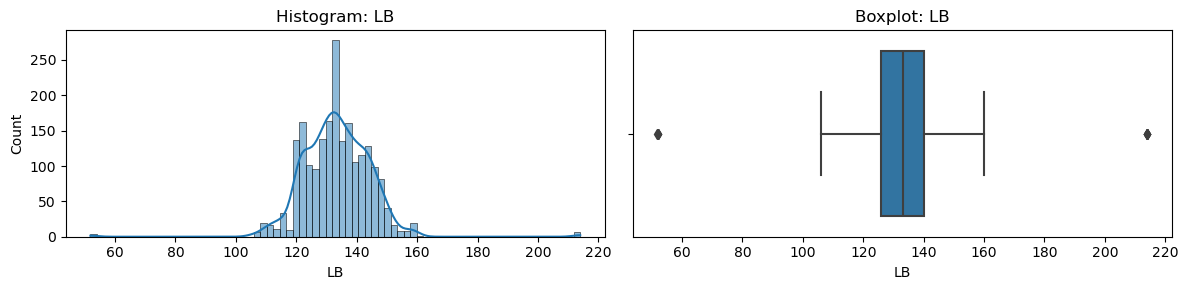

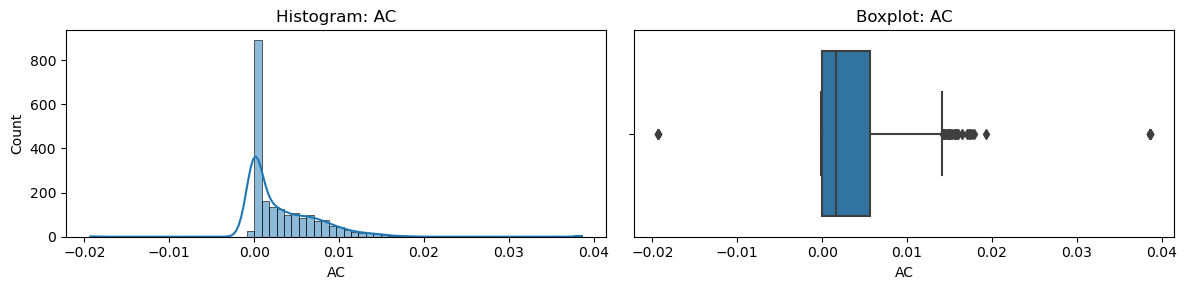

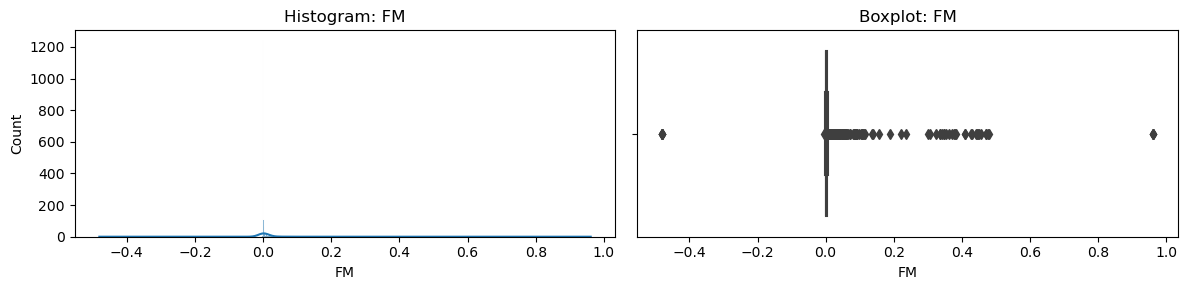

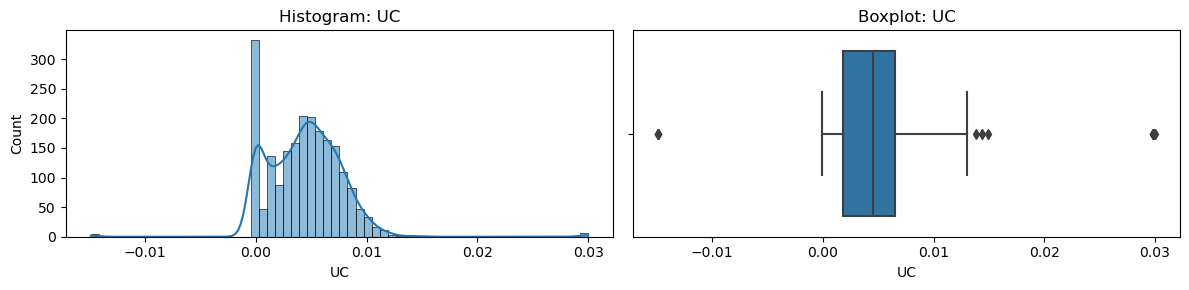

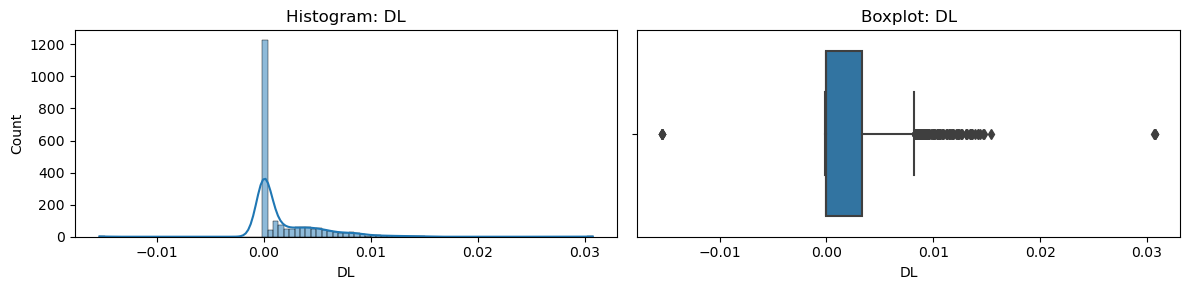

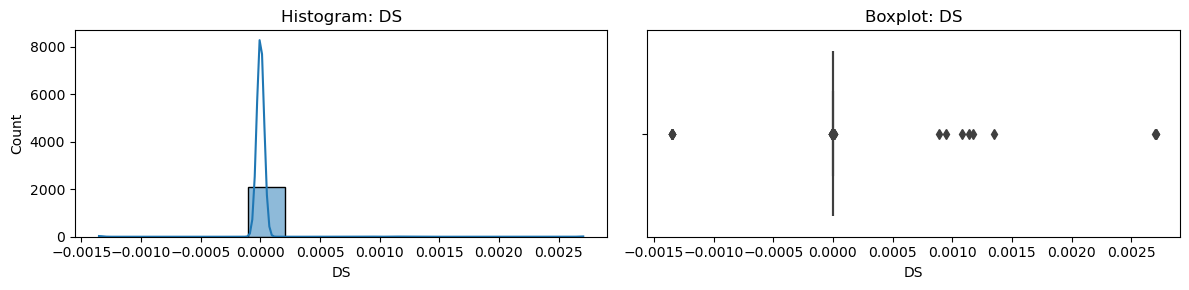

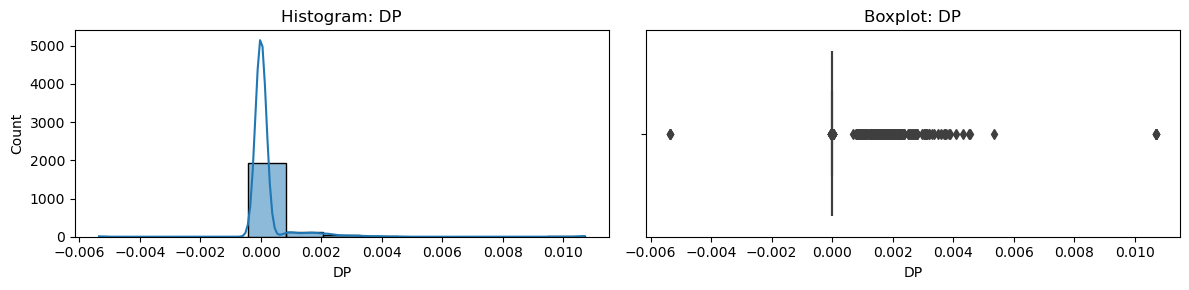

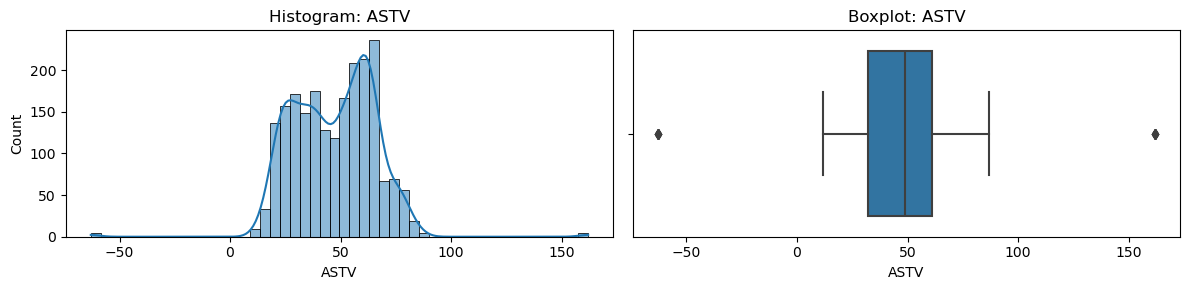

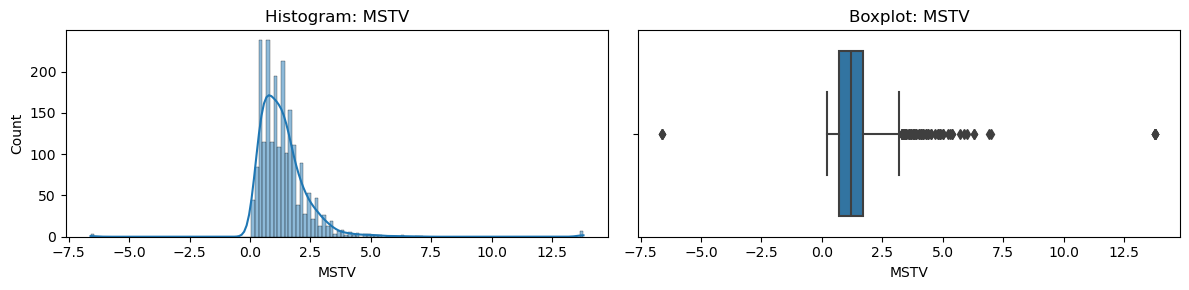

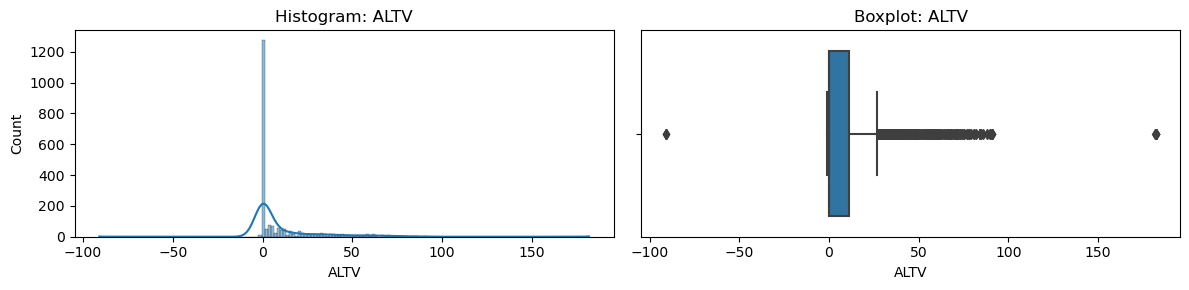

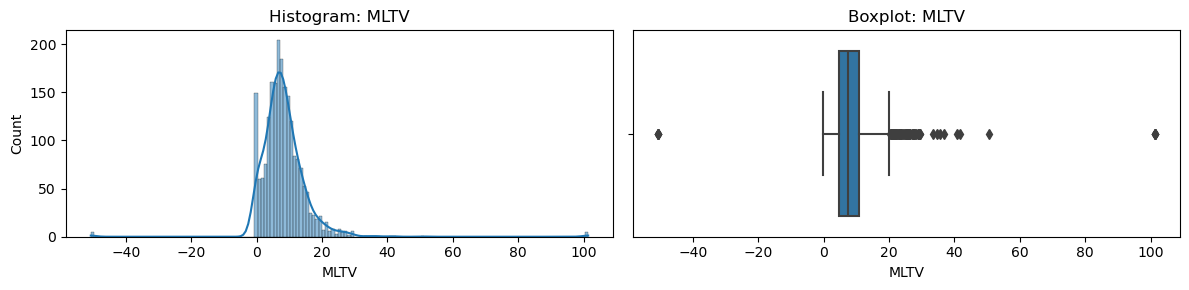

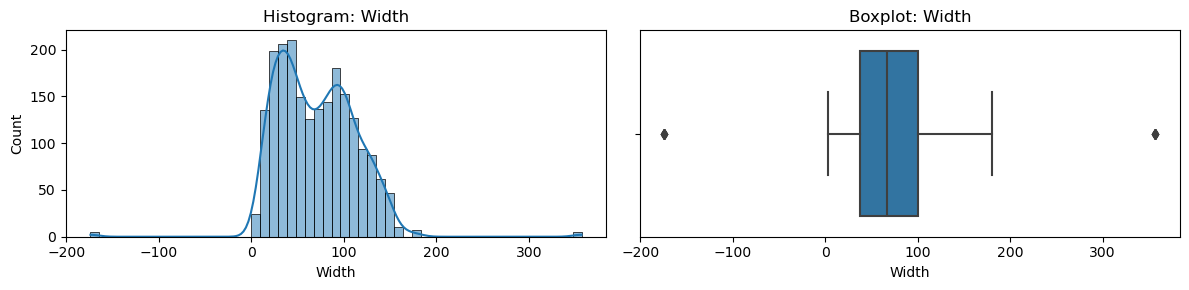

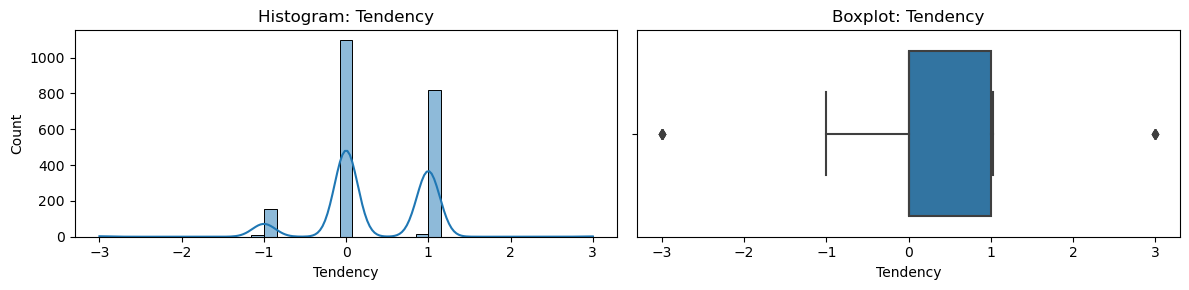

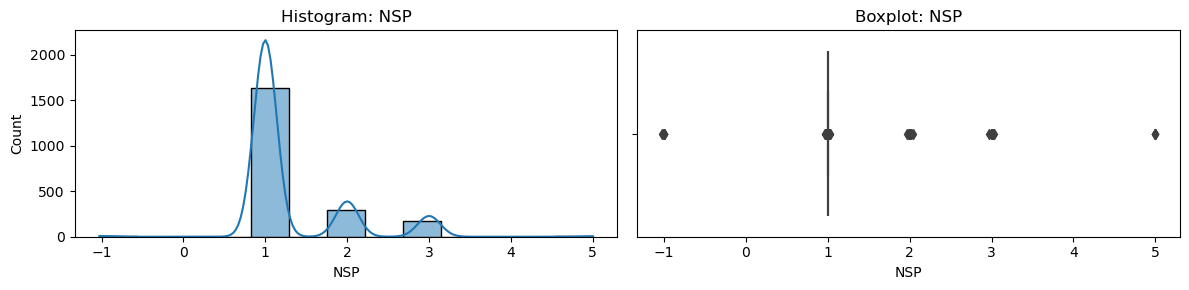

In [8]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in num_cols:
    fig, axes = plt.subplots(1,2, figsize=(12,3))
    sns.histplot(df[col].dropna(), kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram: {col}')
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f'Boxplot: {col}')
    plt.tight_layout()
    plt.show()


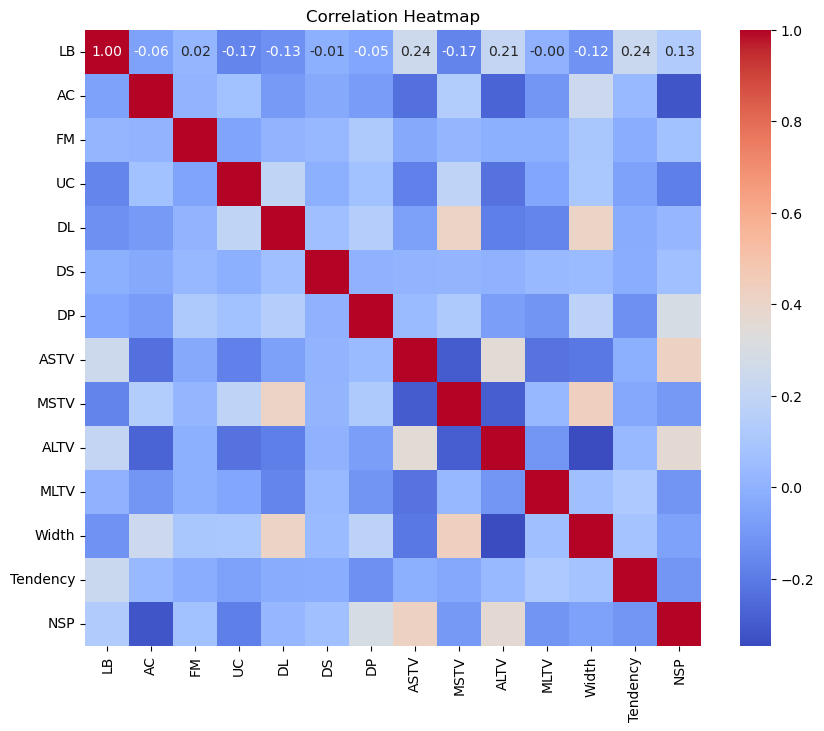

In [9]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


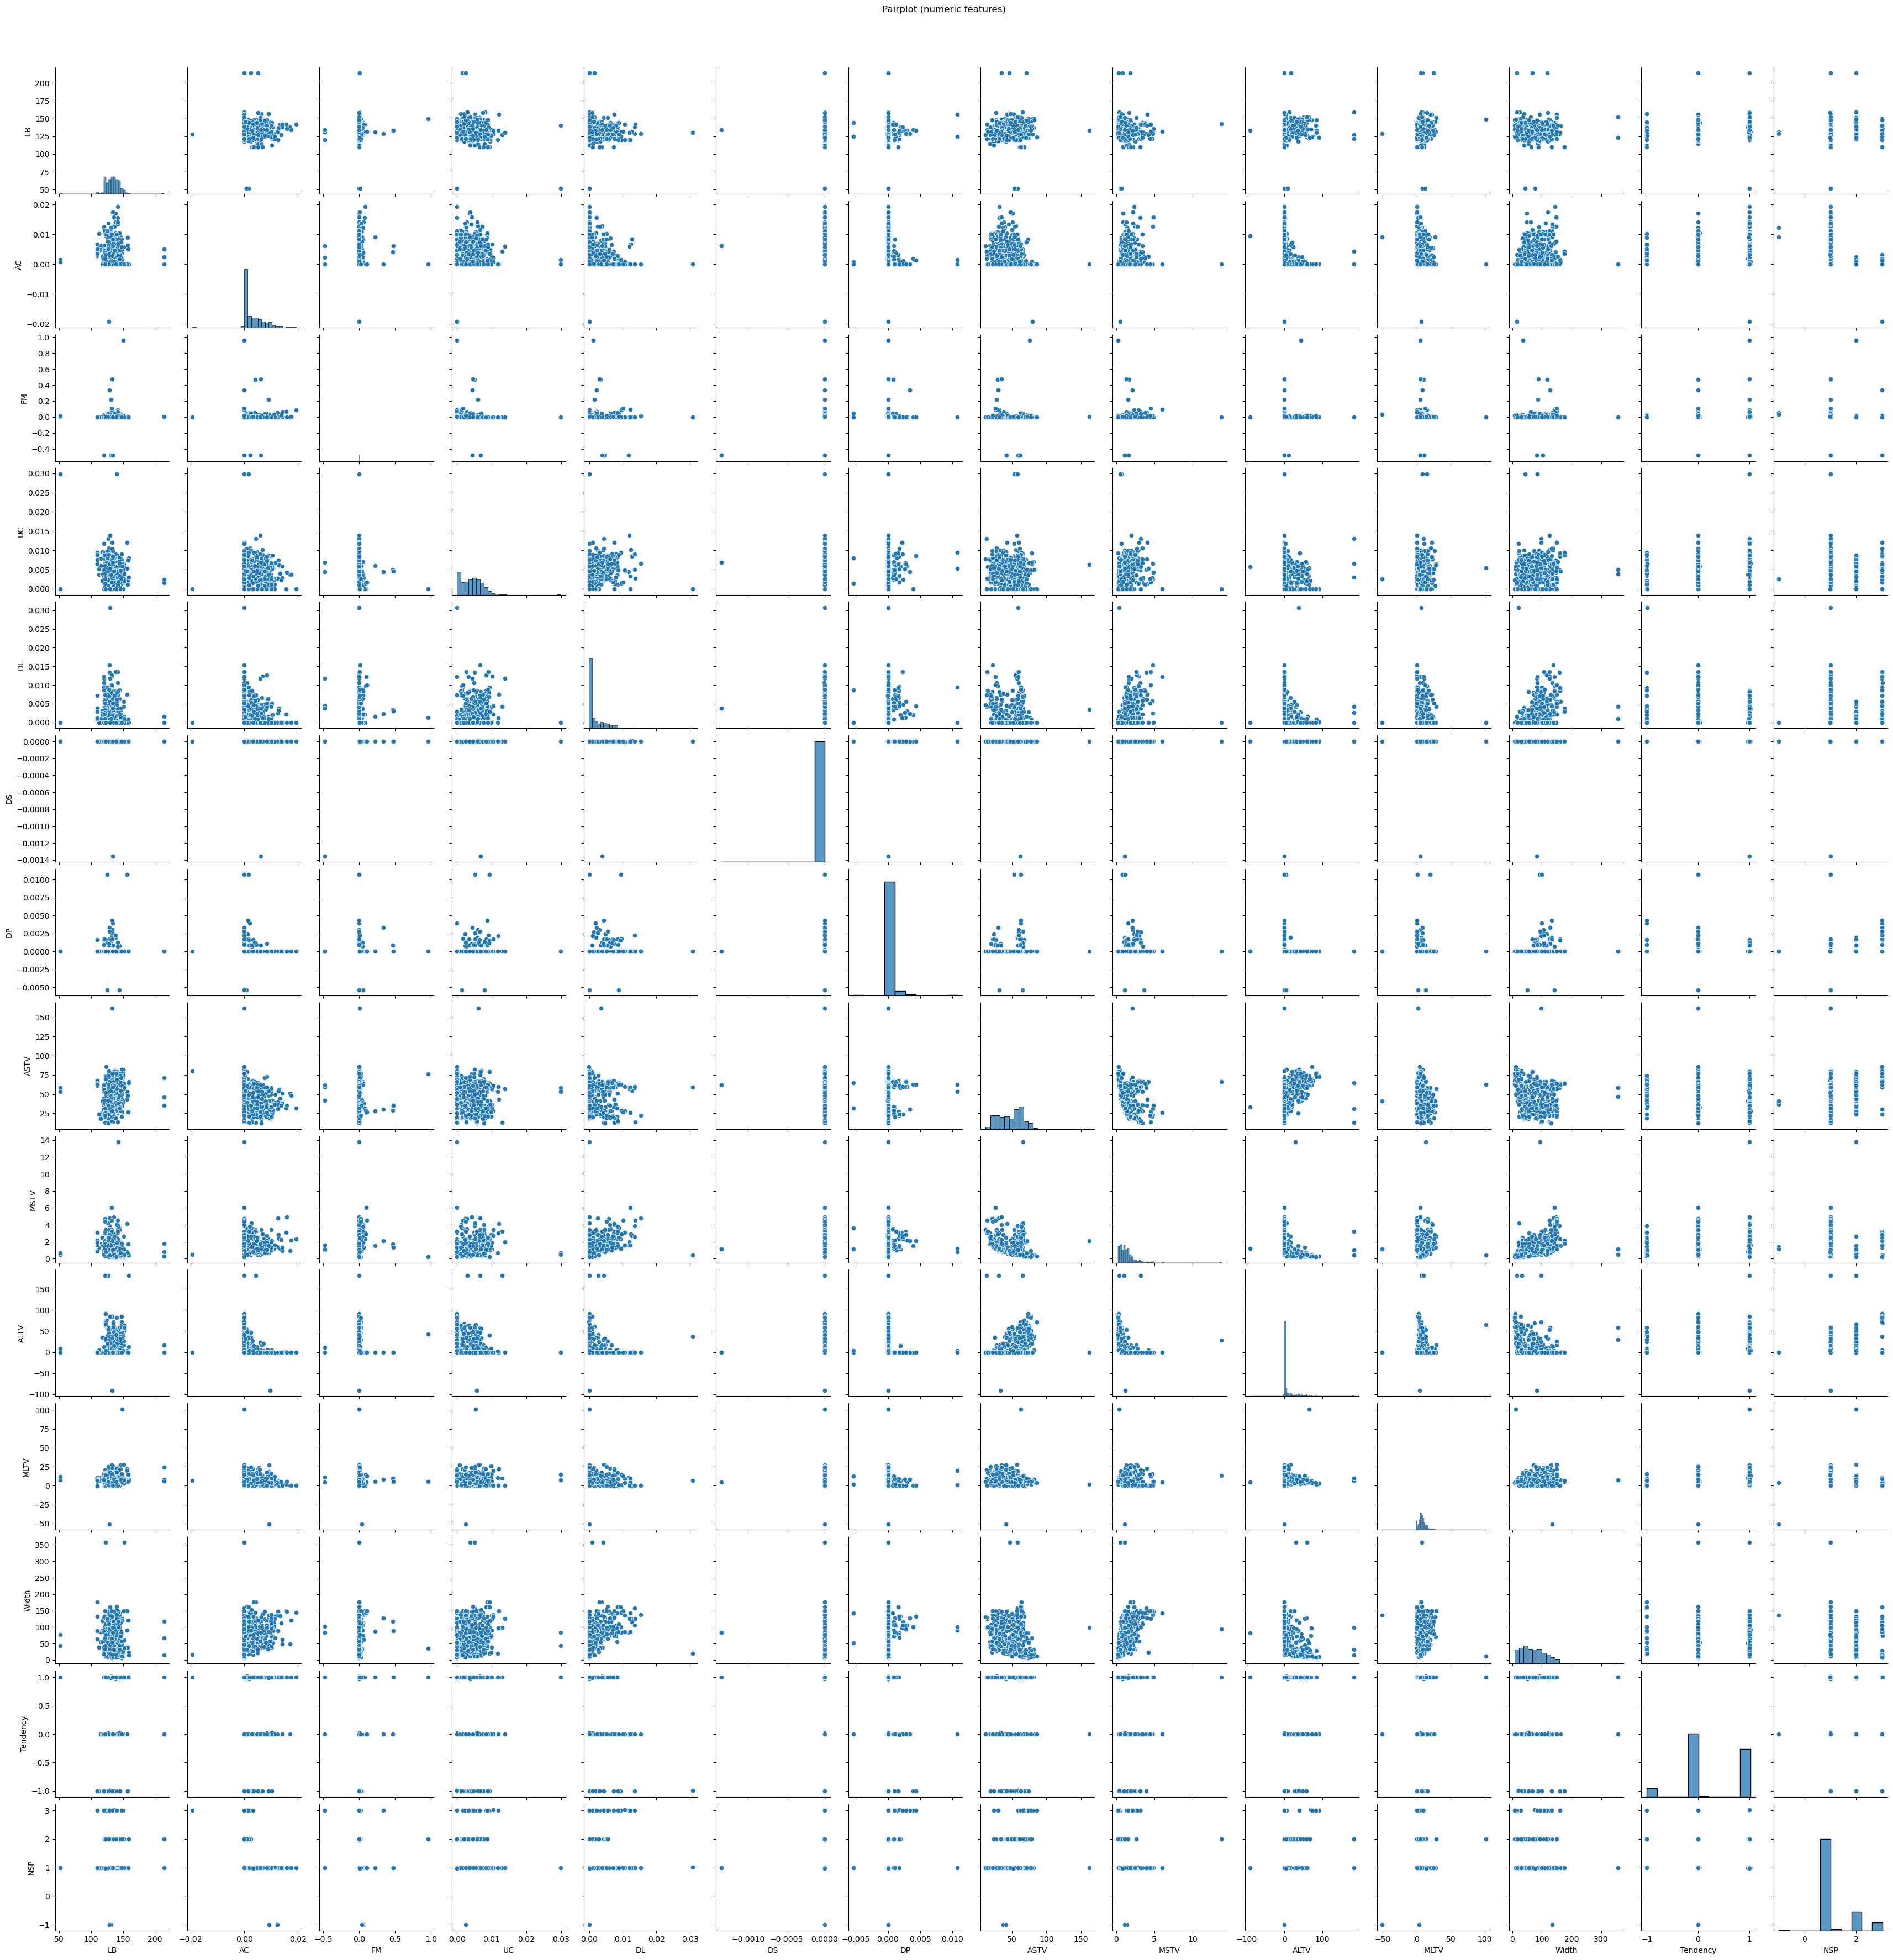

In [10]:
sample = df.sample(n=500, random_state=42) if len(df)>500 else df
sns.pairplot(sample.select_dtypes(include=[np.number]))
plt.suptitle('Pairplot (numeric features)', y=1.02)
plt.show()


In [11]:
target = None
for c in df.columns:
    if df[c].nunique()<=6:
        target = c
        break
if target is not None:
    print('Suggested target:', target)
    display(df[target].value_counts())
    display(df.groupby(target).mean().T)
else:
    print('No obvious small-cardinality target column detected.')


No obvious small-cardinality target column detected.


Explained variance ratio (2 comp): [0.19510717 0.12809151]


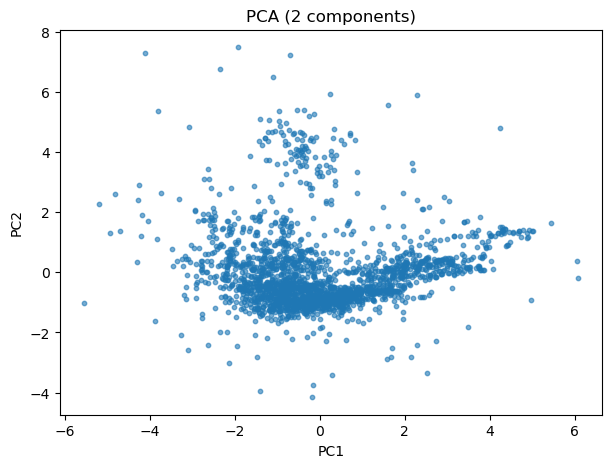

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
num = df.select_dtypes(include=[np.number]).dropna(axis=1, how='all')
scaler = StandardScaler()
X = scaler.fit_transform(num.fillna(num.mean()))
pca = PCA(n_components=2, random_state=42)
pc = pca.fit_transform(X)
print('Explained variance ratio (2 comp):', pca.explained_variance_ratio_)
plt.figure(figsize=(7,5))
plt.scatter(pc[:,0], pc[:,1], s=10, alpha=0.6)
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title('PCA (2 components)')
plt.show()
